In [1]:
import pandas as pd
import sqlite3 as sql
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import BSpline, make_interp_spline
import matplotlib.patheffects as path_effects

In [2]:
db = 'treasury_yield_curve_rates.db'
conn = sql.connect(db)

In [8]:

df = pd.read_sql("SELECT * FROM treasury_yield_table", conn)
df

,id,date,one_mo,two_mo,three_mo,six_month,one_year,two_year,three_year,five_year,seven_year,ten_year,twenty_year,thirty_year
0,1,04/01/21,0.02,0.02,0.02,0.04,0.06,0.17,0.35,0.90,1.37,1.69,2.24,2.34
1,2,04/02/21,0.02,0.02,0.02,0.04,0.07,0.19,0.39,0.97,1.42,1.72,2.27,2.35
2,3,04/05/21,0.03,0.02,0.03,0.04,0.06,0.17,0.37,0.94,1.40,1.73,2.28,2.36
3,4,04/06/21,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.88,1.34,1.67,2.24,2.32
4,5,04/07/21,0.01,0.02,0.02,0.04,0.06,0.16,0.34,0.87,1.34,1.68,2.26,2.35
5,6,04/08/21,0.02,0.02,0.01,0.04,0.05,0.14,0.33,0.85,1.30,1.64,2.22,2.32
6,7,04/09/21,0.02,0.01,0.02,0.03,0.06,0.16,0.35,0.87,1.33,1.67,2.23,2.34
7,8,04/12/21,0.02,0.02,0.02,0.04,0.06,0.18,0.38,0.89,1.35,1.69,2.24,2.34
8,9,04/13/21,0.03,0.02,0.03,0.05,0.06,0.16,0.35,0.85,1.29,1.64,2.21,2.32
9,10,04/14/21,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.87,1.31,1.64,2.22,2.32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21 non-null     int64  
 1   date         21 non-null     object 
 2   one_mo       21 non-null     object 
 3   two_mo       21 non-null     float64
 4   three_mo     21 non-null     float64
 5   six_month    21 non-null     float64
 6   one_year     21 non-null     float64
 7   two_year     21 non-null     float64
 8   three_year   21 non-null     float64
 9   five_year    21 non-null     float64
 10  seven_year   21 non-null     float64
 11  ten_year     21 non-null     float64
 12  twenty_year  21 non-null     float64
 13  thirty_year  21 non-null     float64
dtypes: float64(11), int64(1), object(2)
memory usage: 2.2+ KB


In [5]:
df.iloc[-1][2:]

one_mo             0.01
two_mo         0.010000
three_mo       0.010000
six_month      0.040000
one_year       0.050000
two_year       0.160000
three_year     0.350000
five_year      0.860000
seven_year     1.320000
ten_year       1.650000
twenty_year    2.200000
thirty_year    2.310000
Name: 20, dtype: object

In [26]:
df.iloc[-1]

id                   21
date           04/29/21
one_mo             0.01
two_mo         0.010000
three_mo       0.010000
six_month      0.040000
one_year       0.050000
two_year       0.160000
three_year     0.350000
five_year      0.860000
seven_year     1.320000
ten_year       1.650000
twenty_year    2.200000
thirty_year    2.310000
Name: 20, dtype: object

### first chart

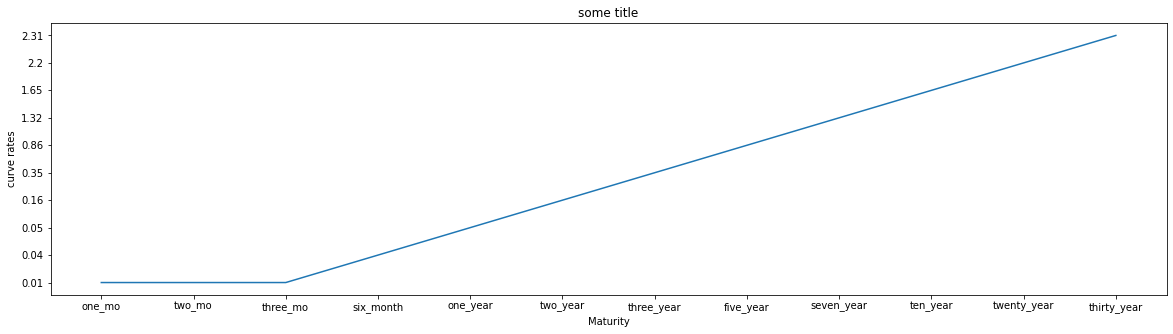

In [8]:
x = df.columns[2:]
y = list(df.iloc[-1][2:])
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(x,y)
labels = ax.get_xticklabels()
ax.set( xlabel = 'Maturity', ylabel= 'curve rates', title = 'some title')
plt.show()

In [17]:
y1 = list(df.iloc[-2][2:])
y1

['0.01', 0.01, 0.01, 0.04, 0.05, 0.17, 0.35, 0.86, 1.31, 1.63, 2.19, 2.29]

In [81]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [146]:
plt.style.use('dark_background')

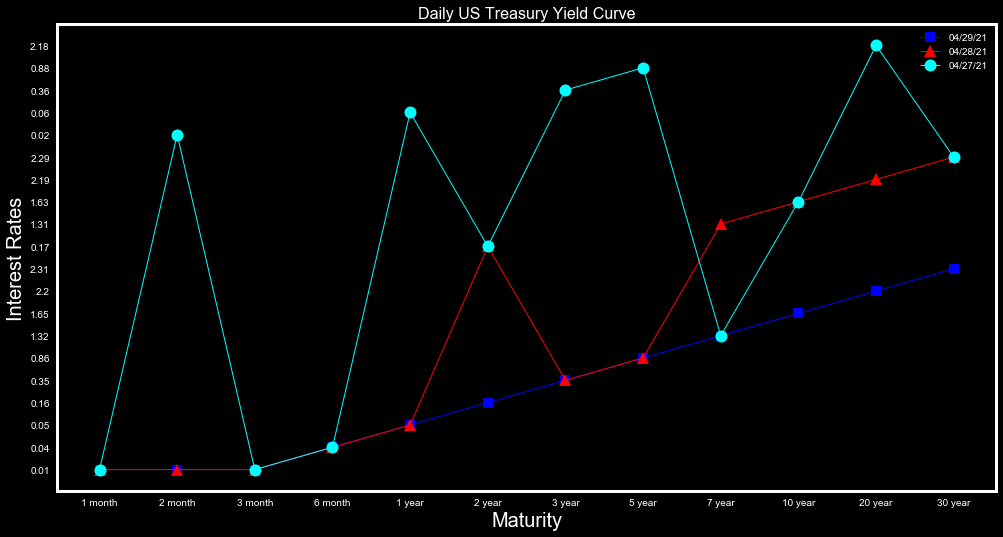

In [149]:
plt.figure(figsize=(15,8))
x = ['1 month', '2 month', '3 month', '6 month', '1 year', '2 year', '3 year', '5 year', '7 year', '10 year', '20 year', '30 year']
y1 = list(df.iloc[-1][2:])
y2 = list(df.iloc[-2][2:])
y3 = list(df.iloc[-3][2:])
plt.plot(x, y1,'s-',color = 'blue', label = df.iloc[-1][1], linewidth=1.0, markersize=10)
plt.plot(x, y2, '^-', color ='red', label = df.iloc[-2][1], linewidth=1.0, markersize=12)
plt.plot(x, y3, 'o-' , color = 'cyan', label = df.iloc[-3][1], linewidth=1.0, markersize=12)
plt.title('Treasury Yield Curve')
plt.xlabel('Maturity', fontsize =20)
plt.ylabel('Interest Rates', fontsize =20)
plt.title('Daily US Treasury Yield Curve')
plt.legend(loc='upper right')
plt.grid(False)
plt.legend()
plt.show()

In [4]:
plt.style.use('bmh')

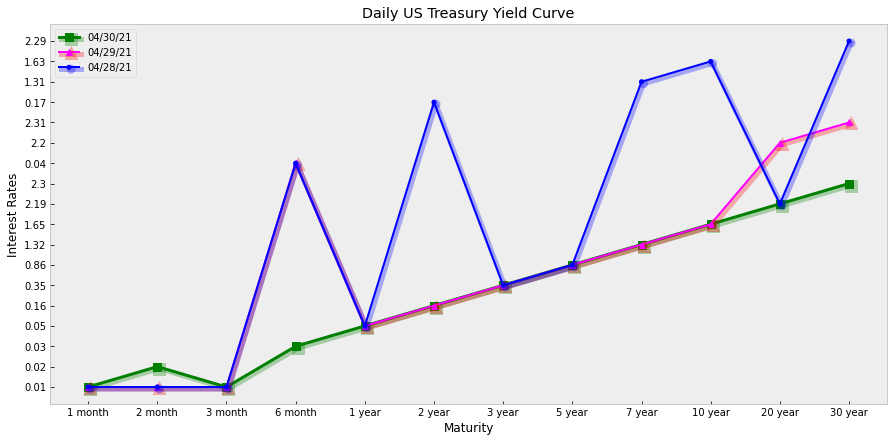

In [14]:
plt.figure(figsize=(15,7))
x = ['1 month', '2 month', '3 month', '6 month', '1 year', '2 year', '3 year', '5 year', '7 year', '10 year', '20 year', '30 year']
y1 = list(df.iloc[-1][2:])
y2 = list(df.iloc[-2][2:])
y3 = list(df.iloc[-3][2:])
plt.plot(x, y1, 'gs-', label = df.iloc[-1][1],markersize=8, linewidth=3.0, path_effects=[path_effects.SimpleLineShadow(shadow_color="green", linewidth=5),path_effects.Normal()])
plt.plot(x, y2, '^-' ,color='magenta', label = df.iloc[-2][1], markersize=6, path_effects=[path_effects.SimpleLineShadow(shadow_color="red", linewidth=5),path_effects.Normal()])
plt.plot(x, y3, 'bo-' , label = df.iloc[-3][1], markersize=4, path_effects=[path_effects.SimpleLineShadow(shadow_color="blue", linewidth=5),path_effects.Normal()])
plt.title('Treasury Yield Curve')
plt.xlabel('Maturity')
plt.ylabel('Interest Rates')
plt.title('Daily US Treasury Yield Curve')
plt.legend(loc='upper left')
plt.grid(False)
plt.show()

### Trying to create an  area curve using fill_betwen or stackplot

In [10]:
plt.figure(figsize=(26,8))
# x = df.columns[2:]
x = ['1 month', '2 month', '3 month', '6 month', '1 year', '2 year', '3 year', '5 year', '7 year', '10 year', '20 year', '30 year']
y1 = list(df.iloc[-1][2:])
y2 = list(df.iloc[-2][2:])
y3 = list(df.iloc[-3][2:])
plt.fill_between(x, y1, 'gs-', label = df.iloc[-1][1])
plt.plot(x, y1, 'gs-', label = df.iloc[-1][1])
plt.plot(x, y2, 'r^-' , label = df.iloc[-2][1])
plt.plot(x, y3, 'bo-' , label = df.iloc[-3][1])
# plt.stackplot(x, y1, y2, labels = ['A', 'B'])
plt.xlabel('Maturity')
plt.ylabel('curve rates')
plt.title('Daily Treasury Yield Curve')
plt.legend(loc='upper left')

# x_new = np.linspace(1, 4, 300)
# a_BSpline = make_interp_spline(x, y1)
# y_new = a_BSpline(x_new)

# plt.plot(x_new, y_new)

# SMALL_SIZE = 20
# MEDIUM_SIZE = 40
# BIGGER_SIZE = 60

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a numpy.float64

In [51]:
x = df['date'][-3:]
y_one = df['one_mo'][-3:]
y_two = df['two_mo'][-3:]
plt.stackplot(x,
              y_one, y_two,
              labels=['one month', 'two month'],
              alpha=0.8)

plt.show()

TypeError: can only concatenate str (not "float") to str

### Trying to do interpolation of data to make smooth curve

In [64]:
f = interp1d(x, y1)
# f2 = interp1d(x, y2, kind = 'cubic')

ValueError: x and y arrays must be equal in length along interpolation axis.

In [61]:
xnew = np.linspace(0, 4,20)
xnew

array([0.        , 0.21052632, 0.42105263, 0.63157895, 0.84210526,
       1.05263158, 1.26315789, 1.47368421, 1.68421053, 1.89473684,
       2.10526316, 2.31578947, 2.52631579, 2.73684211, 2.94736842,
       3.15789474, 3.36842105, 3.57894737, 3.78947368, 4.        ])

In [62]:
xnew = np.linspace(0, 4,20)

plt.plot(x, y1, 'o', xnew, f(xnew), '-')

plt.legend(['data', 'linear'], loc = 'best')

plt.show()

TypeError: '<' not supported between instances of 'str' and 'float'

### Code to save image in a file

generating matplotlib chart
completed


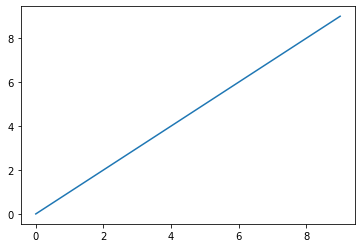

In [11]:

import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

def make_chart(data, filename):
    print("generating matplotlib chart")
    plt.plot(data)
#     plt.savefig(f'charts/{filename}.png')
    print("completed")
    
def main():
    dt_now = dt.datetime.now()
    dt_fmt = dt_now.strftime("%m-%d-%y-%H%M%S")
    make_chart(np.arange(10), f'test-{dt_fmt}')
    
main()

In [7]:
conn.close()

In [16]:
import scipy

In [17]:
scipy.__version__

'1.6.0'

In [2]:
#to check if you are in a virtual environment. If true, then you are not in a virtual environment
sys.prefix == sys.base_prefix

True